# Defining model units and number of layers

In [0]:
import tensorflow as tf
#print(tf.__version__)
n_inputs = 28*28 
n_hidden1 = 1024 
n_hidden2 = 1024
n_hidden3 = 1024
n_hidden4 = 1024
n_hidden5 = 1024
n_outputs = 10

In [0]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

# Defining the model

In [0]:
from tensorflow.contrib.layers import fully_connected
with tf.variable_scope("dnn"):
    hidden1 = fully_connected(X, n_hidden1, scope="hidden1") 
    hidden2 = fully_connected(hidden1, n_hidden2,scope="hidden2")
    hidden3 = fully_connected(hidden2, n_hidden3,scope="hidden3")
    hidden4 = fully_connected(hidden3, n_hidden4,scope="hidden4")
    hidden5 = fully_connected(hidden4, n_hidden5,scope="hidden5")
    logits = fully_connected(hidden5, n_outputs, scope="outputs",activation_fn=None)

Instructions for updating:
Please use `layer.__call__` method instead.


# Loss Function

In [0]:
with tf.name_scope("loss"):
        xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
        loss = tf.reduce_mean(xentropy, name="loss")

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



# Learning rate and Optimizer

In [0]:
learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate) 
    training_op = optimizer.minimize(loss)

# Accuracy Calculation

In [0]:
with tf.name_scope("eval"):
    correct_pred = tf.equal(tf.math.argmax(logits,1),tf.math.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()    

# Reading MNIST data

In [0]:
from tensorflow.examples.tutorials.mnist import input_data 
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# Epochs and batch size

In [0]:
n_epochs = 40
batch_size = 50

# Training the model(base line network)

In [0]:
with tf.Session() as sess: 
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
                X_batch, y_batch = mnist.train.next_batch(batch_size)
                sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print('Epoch',epoch, "Train accuracy:", acc_train)
    save_path = saver.save(sess, "./my_model_final.ckpt")
    

Epoch 0 Train accuracy: 0.96
Epoch 1 Train accuracy: 1.0
Epoch 2 Train accuracy: 0.96
Epoch 3 Train accuracy: 0.98
Epoch 4 Train accuracy: 0.94
Epoch 5 Train accuracy: 0.98
Epoch 6 Train accuracy: 0.98
Epoch 7 Train accuracy: 0.96
Epoch 8 Train accuracy: 1.0
Epoch 9 Train accuracy: 1.0
Epoch 10 Train accuracy: 1.0
Epoch 11 Train accuracy: 1.0
Epoch 12 Train accuracy: 1.0
Epoch 13 Train accuracy: 1.0
Epoch 14 Train accuracy: 1.0
Epoch 15 Train accuracy: 1.0
Epoch 16 Train accuracy: 1.0
Epoch 17 Train accuracy: 1.0
Epoch 18 Train accuracy: 1.0
Epoch 19 Train accuracy: 1.0
Epoch 20 Train accuracy: 1.0
Epoch 21 Train accuracy: 1.0
Epoch 22 Train accuracy: 1.0
Epoch 23 Train accuracy: 1.0
Epoch 24 Train accuracy: 1.0
Epoch 25 Train accuracy: 1.0
Epoch 26 Train accuracy: 1.0
Epoch 27 Train accuracy: 1.0
Epoch 28 Train accuracy: 1.0
Epoch 29 Train accuracy: 1.0
Epoch 30 Train accuracy: 1.0
Epoch 31 Train accuracy: 1.0
Epoch 32 Train accuracy: 1.0
Epoch 33 Train accuracy: 1.0
Epoch 34 Train ac

# Restoring the model checkpoint and running on test data

In [0]:
with tf.Session() as sess:
    init.run()
    saver.restore(sess, "./my_model_final.ckpt")
    for epoch in range(n_epochs): 
      acc_test1 = accuracy.eval(feed_dict={X: mnist.test.images[:1000],y: mnist.test.labels[:1000]})
    print("Epoch:",epoch, "Test accuracy1:", acc_test1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
Epoch: 39 Test accuracy1: 0.98


# Collecting weights and biases for all 6 layers(including output layer)

In [0]:

with tf.Session() as sess:
    init.run()
    saver.restore(sess, "./my_model_final.ckpt")
    all_vars= tf.global_variables()
    def var_name(name):
        for i in range(len(all_vars)):
            #print (all_vars)
            #print(all_vars[i]) 
            if all_vars[i].name.startswith(name):
                return all_vars[i]
        return None
    w1 = var_name('dnn/hidden1/weights')
    w2 = var_name('dnn/hidden2/weights')
    w3 = var_name('dnn/hidden3/weights')
    w4 = var_name('dnn/hidden4/weights')
    w5 = var_name('dnn/hidden5/weights')
    w6 = var_name('dnn/outputs/weights')
    b1=var_name('dnn/hidden1/biases')
    b2=var_name('dnn/hidden1/biases')
    b3=var_name('dnn/hidden1/biases')
    b4=var_name('dnn/hidden1/biases')
    b5=var_name('dnn/hidden1/biases')
    b6=var_name('dnn/outputs/biases')
   

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [0]:
w1,w2,w3,w4,w5,w6,b1,b2,b3,b4,b5,b6

(<tf.Variable 'dnn/hidden1/weights:0' shape=(784, 1024) dtype=float32_ref>,
 <tf.Variable 'dnn/hidden2/weights:0' shape=(1024, 1024) dtype=float32_ref>,
 <tf.Variable 'dnn/hidden3/weights:0' shape=(1024, 1024) dtype=float32_ref>,
 <tf.Variable 'dnn/hidden4/weights:0' shape=(1024, 1024) dtype=float32_ref>,
 <tf.Variable 'dnn/hidden5/weights:0' shape=(1024, 1024) dtype=float32_ref>,
 <tf.Variable 'dnn/outputs/weights:0' shape=(1024, 10) dtype=float32_ref>,
 <tf.Variable 'dnn/hidden1/biases:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'dnn/hidden1/biases:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'dnn/hidden1/biases:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'dnn/hidden1/biases:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'dnn/hidden1/biases:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'dnn/outputs/biases:0' shape=(10,) dtype=float32_ref>)

In [0]:

w=[]
b=[]
w.append(w1)
w.append(w2)
w.append(w3)
w.append(w4)
w.append(w5)
w.append(w6)
b.append(b1)
b.append(b2)
b.append(b3)
b.append(b4)
b.append(b5)
b.append(b6)


# Function to calculate svd and wbar
1. We will get all singular values then we will convert the s to diagonal matrix named s_diag, and multiply with v to get vbar
2. We will get approx weight(new weight) by multiplying vbar and u(left singular matrix)

In [0]:
def calculate_svd(X):
  s, u, v = tf.svd(X)
  
  s_diag = tf.linalg.diag(s)
  
  return s_diag, u, v

def calculate_W_bar(s, u, v):
  v_bar = tf.matmul(s, v, adjoint_b=True)
  result = tf.matmul(u, v_bar)
  
  return result , v_bar

# Creating s1,u1,v1 matrix for all the weights except the last layer weight

In [0]:
s1 = []
u1 = []
v1 = []
for i in range(0 , len(w)-1):
  s, u, v = calculate_svd(w[i])
  
  s1.append(s)
  u1.append(u)
  v1.append(v)

In [0]:
D = [10, 20, 50, 100, 200, 'DFull']

# Creating W_bar list for approx weights for all 5 layers for each D value
It contains 30 weight values

In [0]:
W_bar_l = []
s_d_list = []
u_d_list = []
v_d_list = []
v_bar_list = []

for d_val in D:
  for j in range(0, len(w)-1):
    if d_val == 'DFull':
      s_d = s1[j][: , :]
      u_d = u1[j][: , :]
      v_d = v1[j][: , :]
    else:
      s_d = s1[j][:d_val , :d_val]
      u_d = u1[j][: , :d_val]
      v_d = v1[j][: , :d_val]
        
    s_d_list.append(s_d)
    u_d_list.append(u_d)
    v_d_list.append(v_d)
    
    result , v_bar = calculate_W_bar(s_d , u_d , v_d)
    
    W_bar_l.append(result)
    v_bar_list.append(v_bar)

In [0]:
len(W_bar_l),len(v_bar_list)

(30, 30)

In [0]:
#sess.run(tf.assign(hidden1,W_bar_l[0]))
#sess.run(tf.assign(hidden2,W_bar_l[1]))
#sess.run(tf.assign(hidden3,W_bar_l[2]))
#sess.run(tf.assign(hidden4,W_bar_l[3]))
#sess.run(tf.assign(hidden5,W_bar_l[4]))

# Creating feed forward network to pass the newly created weights for each D

In [0]:
def feed_forward(input , activation_layer , weights , biases , last_layer_weight):
  result = []
  n = len(weights)
  for i in range(0 , n+1):
    if i == 0:
      temp = activation_layer[i](tf.matmul(input , weights[i]) + biases[i])
    elif i < n:
      temp = activation_layer[i](tf.matmul(result[i-1] , weights[i]) + biases[i])
    else:
      temp = activation_layer[i](tf.matmul(result[i-1] , last_layer_weight) + biases[i])
    
    result.append(temp)
   
  return result

# Function to calculate accuracy

In [0]:
def calculate_accuracy(x , y):
  count_equal_values = tf.equal(tf.argmax(x, 1), tf.argmax(y, 1))
  answer = count_equal_values.eval()
  
  count = 0
  for i in range(len(answer)):
    if answer[i] == True:
      count+=1      
  
  return count

In [0]:
#len(act_layers),len(W_bar_l),len(b)

In [0]:
test_x , test_y = mnist.test.next_batch(10000)

# Restoring my model parameters and passing the new weights to calculate accuracy

We can see the accuracy increases for higher value of D

In [0]:

act_layers = [tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu,tf.nn.softmax]
accuracy_list = []
with tf.Session() as sess:
    init.run()
    saver.restore(sess, "./my_model_final.ckpt")
    for i in range(0 , len(W_bar_l) , 5):
      print(i)
      ff_output = feed_forward(test_x , act_layers , W_bar_l[i : i+5] , b , w[5])
      #print(ff_output)
      accuracy = calculate_accuracy(ff_output[-1] , test_y)
      accuracy = accuracy/test_y.shape[0]
      
      accuracy_list.append(accuracy)
      print('Accuracy for D: ' + str(D[int(i/5)]) + ' is '+ str(accuracy))

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
0
Accuracy for D: 10 is 0.4121
5
Accuracy for D: 20 is 0.513
10
Accuracy for D: 50 is 0.575
15
Accuracy for D: 100 is 0.707
20
Accuracy for D: 200 is 0.9317
25
Accuracy for D: DFull is 0.9793


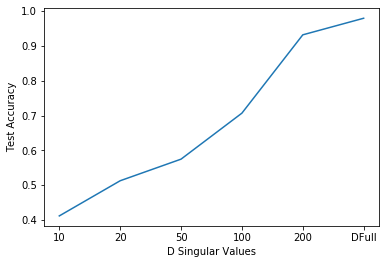

In [0]:
import matplotlib.pyplot as plt
plt.plot(D , accuracy_list)
plt.xlabel('D Singular Values')
plt.ylabel('Test Accuracy')
plt.show()

# Defining new model to increase performance of the old model for D=20

In [0]:
def getModel(x , act_layers , neurons , u_weights , v_bar_weights , last_layer_weight):
    num_layers = len(act_layers)
    layers = [0]*num_layers
    
    if u_weights and v_bar_weights:
      for i in range(0 , num_layers):        
        if i == 0:
            u_index = i // 2
            kernel_weight = tf.constant_initializer(u_weights[u_index].eval())
            layers[i] = tf.layers.dense(x , units= neurons[i] , activation=act_layers[i] , kernel_initializer=kernel_weight)   
            
        elif i < num_layers-1:
          if i % 2 == 0:
            u_index = i // 2
            kernel_weight = tf.constant_initializer(u_weights[u_index].eval())
            layers[i] = tf.layers.dense(layers[i-1] , units= neurons[i] , activation=act_layers[i] , kernel_initializer=kernel_weight)
            
          else:
            v_index = i // 2
            kernel_weight = tf.constant_initializer(v_bar_weights[v_index].eval())
            layers[i] = tf.layers.dense(layers[i-1] , units= neurons[i] , activation=act_layers[i] , kernel_initializer=kernel_weight)
            
        else:
            kernel_weight = tf.constant_initializer(last_layer_weight.eval())
            layers[i] = tf.layers.dense(layers[i-1] , units= neurons[i] , activation=act_layers[i] , kernel_initializer=kernel_weight)
    else:
      for i in range(0 , num_layers):        
          if i == 0:
              layers[i] = tf.layers.dense(x , units= neurons[i] , activation=act_layers[i])        
          elif i < num_layers-1:
              layers[i] = tf.layers.dense(layers[i-1] , units= neurons[i] , activation=act_layers[i])
          else:
              layers[i] = tf.layers.dense(layers[i-1] , units= neurons[i] , activation=act_layers[i])
    
    return layers

# Defining Model parameters

In [0]:
import numpy as np
new_learning_rate = 0.0003
new_act_layers = [tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.relu, tf.nn.softmax]
new_neurons = [20, 1024, 20, 1024, 20, 1024, 20, 1024, 20, 1024, 10]
new_num_layers = len(new_act_layers)
new_batch_size = 1000
total_train_images = np.shape(mnist.train.images)[0]

# Passing the U values and Vbar values for D=20 to get apprimated weights

In [0]:
with tf.Session() as sess:
    init.run()
    new_output = getModel(X, new_act_layers, new_neurons , u_d_list[5 : 10] , v_bar_list[5 : 10] , w[-1])

Instructions for updating:
Use keras.layers.Dense instead.


# Loss function,optimizer and accuracy formulas

In [0]:
new_loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits = new_output[new_num_layers - 1], labels = y)
new_train_step = tf.train.AdamOptimizer(new_learning_rate).minimize(new_loss)
new_correct_prediction = tf.equal(tf.argmax(new_output[new_num_layers - 1], 1), tf.argmax(y, 1))
new_accuracy = tf.reduce_mean(tf.cast(new_correct_prediction, tf.float32))

In [0]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
n_epochs=200
for epoch in range(n_epochs):
  for i in range(total_train_images // new_batch_size):      
      
    input_batch, labels_batch = mnist.train.next_batch(new_batch_size)
    feed_dict = {X: input_batch, y: labels_batch}

    new_train_step.run(feed_dict=feed_dict)
    

  test_x , test_y = mnist.test.next_batch(10000)
  new_test_accuracy = new_accuracy.eval(feed_dict={X: test_x, y: test_y})
  print("Epoch %d, testing accuracy %g"%(epoch, new_test_accuracy))  

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 0, testing accuracy 0.3365
Epoch 1, testing accuracy 0.497
Epoch 2, testing accuracy 0.626
Epoch 3, testing accuracy 0.7433
Epoch 4, testing accuracy 0.7793
Epoch 5, testing accuracy 0.7897
Epoch 6, testing accuracy 0.7972
Epoch 7, testing accuracy 0.8088
Epoch 8, testing accuracy 0.8161
Epoch 9, testing accuracy 0.8201
Epoch 10, testing accuracy 0.8253
Epoch 11, testing accuracy 0.8282
Epoch 12, testing accuracy 0.8339
Epoch 13, testing accuracy 0.8368
Epoch 14, testing accuracy 0.8382
Epoch 15, testing accuracy 0.8399
Epoch 16, testing accuracy 0.8405
Epoch 17, testing accuracy 0.8428
Epoch 18, testing accuracy 0.8445
Epoch 19, testing accuracy 0.8458
Epoch 20, testing accuracy 0.8474
Epoch 21, testing accuracy 0.848
Epoch 22, testing accuracy 0.848
Epoch 23, testing accuracy 0.8509
Epoch 24, testing accuracy 0.849
Epoch 25, testing accuracy 0.8505
Epoch 26, testing accuracy 0.848
Epoch 27, testing accuracy 0.8506
Epoch 28, testing accuracy 0.854
Epoch 29, testing accuracy 0.85